In [1]:
import pandas as pd

In [2]:
# 导入数据
text_ana = pd.read_csv('text_analysis_weibo.csv', index_col = 0)
# text_ana = text_ana.drop(['Unnamed: 0'], axis = 1)
text_ana

,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
0,#高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 ​​,0,0,0,a2331b38901d62d2d9a20529177ef3b3,0,22,湖北
1,转发C,0,0,0,d6dc4470f51fce93cc0cbad8abf55a75,0,33,广西
2,【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待...,0,0,0,372bc4782eb442b88035f920a7c1a68e,6,85,广东
3,丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一...,0,0,0,6fe0d482bd3e78a3483e2a1d57f14ef2,75,1012,广东
4,诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！,0,0,0,872380d71d6ee9130e8b49d331f2baa9,0,10,广东
...,...,...,...,...,...,...,...,...
49995,935天气路况早知道 2022年3月2日 星期三 今日限行尾号3和8 8：00分发布 ...,0,0,0,2231ab79796d569625633acafd9f1351,445,74,河南
49996,4月1日起，交通违法记分规则重大调整！ http://t.cn/A66zxfR0 ​​,0,0,0,91c9d380c1cc7811be5ee10ce510d77a,842,54,甘肃
49997,转发C,0,0,1,301771db13798e2dd493c02a44e59444,99,3433,江苏
49998,全体 甘肃车主注意 4月1日起，全面实施！ ...,0,0,0,NaN,0,0,甘肃


In [5]:
def remove_nums(text):
    nonums = re.sub('[^\u4e00-\u9fa5]+', '', text)
    return nonums

In [7]:
import jieba

In [29]:
def word_segmentation(text):
    words = jieba.lcut(text)
    return ' '.join(words)

In [33]:
text_ana['标题/微博内容'] = text_ana['标题/微博内容'].iloc[:100].astype(str).apply(word_segmentation)
text_ana['标题/微博内容'].head()

0    #       高校       通报       教师       图书馆       打...
1                                           转发       C
2    【       #       刘雨昕       运动       者       联  ...
3    丁程鑫       /       /       @       丁程鑫       后援...
4    诶       ，       你们       真       不要脸       诶  ...
Name: 标题/微博内容, dtype: object

In [34]:
# 分析语料
text = list(text_ana['标题/微博内容'].dropna())
text

['#       高校       通报       教师       图书馆       打电话       声音       过大       出言不逊       #       公道       自       在       人心       ，       谣言       自       在       人心               \u200b       \u200b',
 '转发       C',
 '【       #       刘雨昕       运动       者       联       濛       #       河山       覆       冰雪       ，       健儿       迎       冬奥       [       金牌       ]       全能       唱       跳       不       设限       ，       运动       联       濛       开       新年       🇨       🇳               期待       全能       音乐       人       @       刘雨昕               与       #       运动       者       联       濛       #       一起       ，       为       冬奥       赛事       助力       加油       ！       】',
 '丁程鑫       /       /       @       丁程鑫       后援会       官博       :       #       丁程鑫       [       超话       ]       #               ✨       #       丁程鑫               二十       成金筑梦鑫       世界       #               大年初一       锁定       @       北京       卫视               和       门面       主舞       @       时代       少年       团     

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
# 初始化CountVectorizer
vectorizer = CountVectorizer()

In [37]:
# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text)

In [38]:
# 展示特征矩阵的形状
print('词袋特征矩阵的形状：', X.shape)

词袋特征矩阵的形状： (100, 599)


In [39]:
# 展示词袋模型中的所有特征词
print('特征词列表：', vectorizer.get_feature_names_out())

特征词列表： ['0414' '1020' '167' '17' '18' '19' '2022' '25' '26' '50' 'a669n33f'
 'a66hqzun' 'a66v9mln' 'a6i5bc1o' 'a6ierqv2' 'a6igrcur' 'a6ikvewj'
 'a6ikxrlc' 'a6ilerdz' 'a6ipxoe0' 'a6jy3xv2' 'a6mn51qh' 'a6xwbtdu' 'an35'
 'c2021' 'call' 'cn' 'cosmo' 'cosmo5' 'cup' 'heytea' 'http' 'into1' 'kiki'
 'liveshow' 'lm' 'm28' 'mv' 'rap' 'tfboys' 'to19' 'um' 'vocal' 'wzy'
 'yyds' '一个' '一休' '一天' '一定' '一封' '一届' '一张' '一日' '一片' '一种' '一组' '一起' '一辈子'
 '丁哥' '丁程鑫' '万事' '万里' '三珩' '不仅' '不停' '不是' '不畏' '不要' '不要脸' '不语' '世界' '东奥'
 '东方' '东西' '东进' '严浩翔' '中华' '中国' '中国画' '中国队' '中央美术学院' '丰富多彩' '主舞' '之后' '之火'
 '之约' '之美' '了解' '二十' '产生' '京东' '人心' '人生' '什么' '他们' '代入' '代表团' '代言' '代言人'
 '以此' '休息' '优秀' '会长' '传播' '位列' '位送' '低沉' '你们' '你好' '便是' '保护' '信号' '健儿'
 '兄弟' '全能' '全面' '公道' '六个' '共祝' '关心' '关注' '关键' '其中' '养乐多' '兼好' '再说' '写下'
 '冠军' '冬天' '冬奥' '冬奥会' '冬季' '冬日' '冬梦之约' '冰墩' '冰壶' '冰雪' '准时' '凝聚' '出演'
 '出言不逊' '分享' '刘耀文' '刘雨昕' '刚刚开始' '创冰墩' '前辈' '加油' '加盟' '助力' '助威' '助阵' '努力'
 '劲儿' '勇士' '北京' '十八' '十八岁' '十六个' '十分' '十大' '千玺' '单人滑' '单届' 

In [19]:
list(X.toarray())

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [40]:
# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

In [41]:
# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis = 0).A1))

In [42]:
word_freq

{'0414': 1,
 '1020': 1,
 '167': 1,
 '17': 1,
 '18': 1,
 '19': 3,
 '2022': 1,
 '25': 1,
 '26': 1,
 '50': 1,
 'a669n33f': 1,
 'a66hqzun': 1,
 'a66v9mln': 1,
 'a6i5bc1o': 1,
 'a6ierqv2': 1,
 'a6igrcur': 1,
 'a6ikvewj': 1,
 'a6ikxrlc': 1,
 'a6ilerdz': 1,
 'a6ipxoe0': 1,
 'a6jy3xv2': 1,
 'a6mn51qh': 1,
 'a6xwbtdu': 1,
 'an35': 1,
 'c2021': 1,
 'call': 9,
 'cn': 13,
 'cosmo': 1,
 'cosmo5': 1,
 'cup': 1,
 'heytea': 1,
 'http': 13,
 'into1': 5,
 'kiki': 1,
 'liveshow': 1,
 'lm': 1,
 'm28': 1,
 'mv': 1,
 'rap': 1,
 'tfboys': 1,
 'to19': 1,
 'um': 1,
 'vocal': 1,
 'wzy': 1,
 'yyds': 1,
 '一个': 2,
 '一休': 1,
 '一天': 1,
 '一定': 3,
 '一封': 1,
 '一届': 1,
 '一张': 1,
 '一日': 1,
 '一片': 1,
 '一种': 1,
 '一组': 1,
 '一起': 29,
 '一辈子': 2,
 '丁哥': 1,
 '丁程鑫': 5,
 '万事': 1,
 '万里': 2,
 '三珩': 1,
 '不仅': 1,
 '不停': 1,
 '不是': 3,
 '不畏': 1,
 '不要': 1,
 '不要脸': 1,
 '不语': 1,
 '世界': 1,
 '东奥': 2,
 '东方': 1,
 '东西': 1,
 '东进': 1,
 '严浩翔': 1,
 '中华': 1,
 '中国': 7,
 '中国画': 1,
 '中国队': 1,
 '中央美术学院': 1,
 '丰富多彩': 1,
 '主舞': 1,
 '之后': 1,
 '之火': 2,
 '之约

In [43]:
sorted(word_freq.items(),key = lambda x: x[1], reverse = True)

[('转发', 33),
 ('冬奥', 30),
 ('一起', 29),
 ('北京', 25),
 ('刘雨昕', 20),
 ('运动', 18),
 ('加油', 17),
 ('少年', 14),
 ('cn', 13),
 ('http', 13),
 ('冬奥会', 12),
 ('未来', 12),
 ('冰雪', 11),
 ('健儿', 10),
 ('宋亚轩', 10),
 ('时代', 10),
 ('call', 9),
 ('期待', 8),
 ('中国', 7),
 ('全能', 6),
 ('分享', 6),
 ('徐坤', 6),
 ('我们', 6),
 ('超话', 6),
 ('into1', 5),
 ('丁程鑫', 5),
 ('冰墩', 5),
 ('努力', 5),
 ('周深', 5),
 ('感谢', 5),
 ('林墨', 5),
 ('真的', 5),
 ('自己', 5),
 ('金牌', 5),
 ('音乐', 5),
 ('关注', 4),
 ('助力', 4),
 ('卫视', 4),
 ('后援会', 4),
 ('唱响', 4),
 ('尹浩宇', 4),
 ('新年', 4),
 ('春晚', 4),
 ('朱一龙', 4),
 ('李宇春', 4),
 ('歌手', 4),
 ('温柔', 4),
 ('致敬', 4),
 ('赛场', 4),
 ('19', 3),
 ('一定', 3),
 ('不是', 3),
 ('千玺', 3),
 ('卡布', 3),
 ('可以', 3),
 ('声音', 3),
 ('奥运健儿', 3),
 ('官方', 3),
 ('害羞', 3),
 ('张哥', 3),
 ('日常', 3),
 ('时间', 3),
 ('明星', 3),
 ('涵江', 3),
 ('照亮', 3),
 ('照顾', 3),
 ('燕京啤酒', 3),
 ('生日', 3),
 ('直播', 3),
 ('相信', 3),
 ('相约', 3),
 ('祝福', 3),
 ('罗一舟', 3),
 ('视频', 3),
 ('觉得', 3),
 ('赛事', 3),
 ('越来越', 3),
 ('进行', 3),
 ('一个', 2),
 ('一辈子', 2),
 (

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [47]:
# 根据词袋模型分析结果绘制词云图
wc = WordCloud(width = 1200,
              height = 800,
              background_color = 'white',
              font_path="C:/Windows/Fonts/MSYHL.ttc").generate_from_frequencies(word_freq)

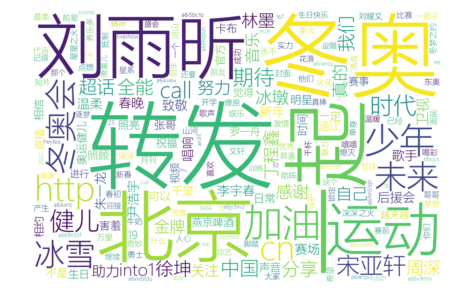

<Figure size 432x288 with 0 Axes>

In [48]:
# 显示词云图
plt.figure(figsize = (10,5))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloud_weibo.png', dpi = 100)